# Importing Python libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler   ## For scaling the data
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout   ## importing layers of Neural network
from keras.callbacks import ModelCheckpoint     ## imporing modelcheck pointer
from keras.losses import MSE                  ## importing error function
from keras.optimizers import Adam              ## importing optimizer
from keras.activations import relu           ## importing activation function



import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> XPEV Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# Loading dataset

In [2]:
data = pd.read_csv('XPEV_Stock.csv')

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling LSTM</center></h1>

# -----------------------------------------------------------------------------------------------------------

# Selecting the Close price

In [3]:
df = data['Close'].values
print("Total No. of days of Stock :",df.shape[0])

Total No. of days of Stock : 231


### Splitting the data into train test split

In [4]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print('Training stock :',dataset_train.shape[0],'days')
print('Test stock :',dataset_test.shape[0],'days')

Training stock : 184 days
Test stock : 97 days


#### Scaling the data

a) Train Data

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train.reshape(-1, 1))


b) Test Data

In [6]:
dataset_test = scaler.transform(dataset_test.reshape(-1, 1))


### Function to prepare data for the LSTM

In [7]:
def create_dataset(df,n):
    x = []
    y = []
  
    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [8]:
x_train, y_train = create_dataset(dataset_train,50)


In [9]:
x_test, y_test = create_dataset(dataset_test,50)


#### Reshape features for LSTM Layer

In [10]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [11]:
print('Training data shape',x_train.shape)
print('Test data shape',x_test.shape)


Training data shape (134, 50, 1)
Test data shape (47, 50, 1)


# Building LSTM Model

In [12]:
model = Sequential()

model.add(LSTM(units=96, 
               return_sequences=True,
               input_shape=(x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96))

model.add(Dropout(0.2))

model.add(Dense(units=1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                7

In [14]:
model.compile(loss=MSE, optimizer=Adam())

In [15]:
checkpointer = ModelCheckpoint(filepath='nio.stock_prediction.hdf5',save_best_only=True,verbose=1)
callbacks = [checkpointer]

In [16]:
history = model.fit(x_train,y_train,batch_size=32,epochs=70,verbose=1,callbacks=[checkpointer],validation_split=0.05)

Epoch 1/70
4/4 [==============================] - ETA: 0s - loss: 0.1140
Epoch 00001: val_loss improved from inf to 0.07763, saving model to nio.stock_prediction.hdf5
4/4 [==============================] - 3s 811ms/step - loss: 0.1140 - val_loss: 0.0776
Epoch 2/70
4/4 [==============================] - ETA: 0s - loss: 0.0453
Epoch 00002: val_loss improved from 0.07763 to 0.00644, saving model to nio.stock_prediction.hdf5
4/4 [==============================] - 1s 156ms/step - loss: 0.0453 - val_loss: 0.0064
Epoch 3/70
4/4 [==============================] - ETA: 0s - loss: 0.0401
Epoch 00003: val_loss did not improve from 0.00644
4/4 [==============================] - 1s 129ms/step - loss: 0.0401 - val_loss: 0.0356
Epoch 4/70
4/4 [==============================] - ETA: 0s - loss: 0.0335
Epoch 00004: val_loss did not improve from 0.00644
4/4 [==============================] - 1s 147ms/step - loss: 0.0335 - val_loss: 0.0416
Epoch 5/70
4/4 [==============================] - ETA: 0s - loss: 

Epoch 38/70
4/4 [==============================] - ETA: 0s - loss: 0.0115
Epoch 00038: val_loss did not improve from 0.00276
4/4 [==============================] - 1s 161ms/step - loss: 0.0115 - val_loss: 0.0034
Epoch 39/70
4/4 [==============================] - ETA: 0s - loss: 0.0117
Epoch 00039: val_loss did not improve from 0.00276
4/4 [==============================] - 1s 183ms/step - loss: 0.0117 - val_loss: 0.0032
Epoch 40/70
4/4 [==============================] - ETA: 0s - loss: 0.0100
Epoch 00040: val_loss did not improve from 0.00276
4/4 [==============================] - 1s 154ms/step - loss: 0.0100 - val_loss: 0.0028
Epoch 41/70
4/4 [==============================] - ETA: 0s - loss: 0.0098
Epoch 00041: val_loss did not improve from 0.00276
4/4 [==============================] - 1s 152ms/step - loss: 0.0098 - val_loss: 0.0040
Epoch 42/70
4/4 [==============================] - ETA: 0s - loss: 0.0115
Epoch 00042: val_loss improved from 0.00276 to 0.00266, saving model to nio.st

### 5. Visualizing Results

#### Plotting the Predicted Stock Price with True Stock Price

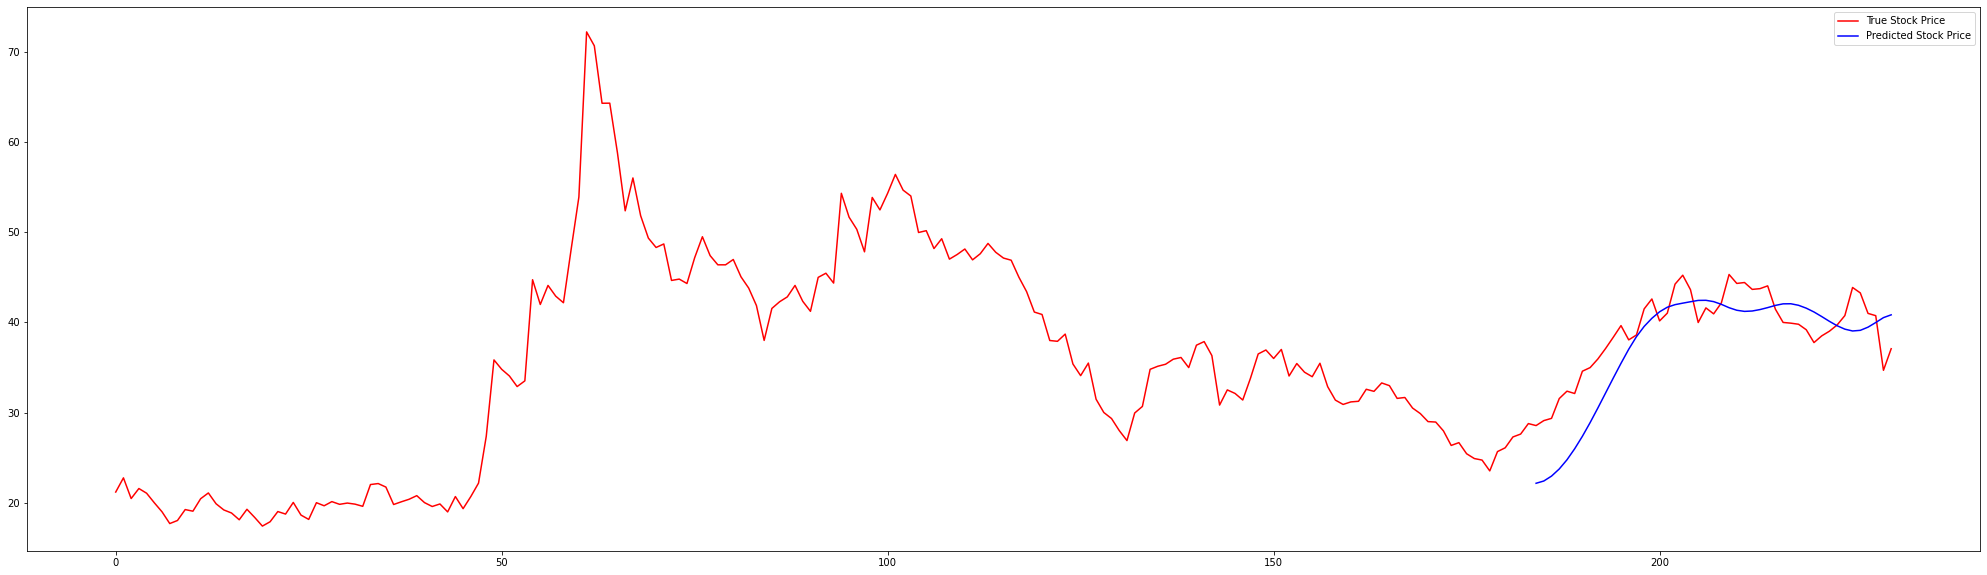

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(35,10))
plt.plot(df, color='red',  label="True Stock Price",)
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Stock Price')
plt.legend()

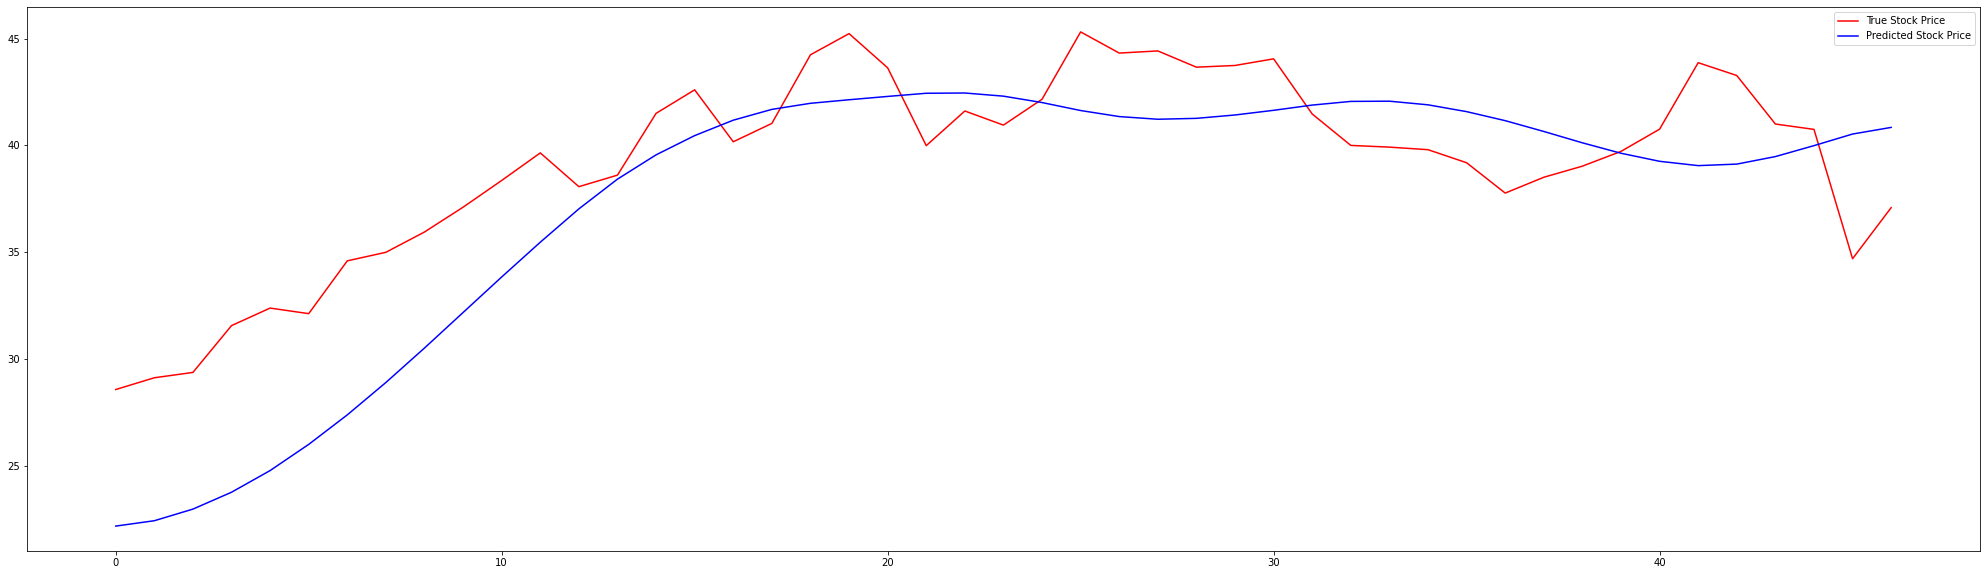

In [18]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(35,10))
ax.plot(y_test_scaled, color='red', label='True Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.legend()

The Graph looks beautiful !!

## Evaluation

In [19]:
data.reset_index(inplace=True)
comparison = data[['date','Close']].iloc[len(y_train)+50:] 
comparison['Predictions'] = predictions

### MSE

In [20]:
LR_test_mse=mean_squared_error(comparison['Close'],comparison['Predictions'])
print('Mean Squared Error: ', round(LR_test_mse,5))

Mean Squared Error:  14.43531


### MAE

In [21]:
LR_test_MAE=mean_absolute_error(comparison['Close'],comparison['Predictions'])
print('Mean Absolute Error: ', round(LR_test_MAE,5))

Mean Absolute Error:  3.12593
